# Survey of Unsupervised Learning Methods

In this survey of learning methods, we'll look at implementations of the following algorithms.

- K-Means
- DBSCAN
- Principle Component Analysis

## Preparing the Environment

To perform these machine learning tasks, we'll make use of the following libraries and their dependencies.

- sklearn - a machine learning library
- seaborn - a data visualization library
- pandas - library providing the data structures in which we'll store our data

In [1]:
import sys
!{sys.executable} -m pip install sklearn seaborn pandas

We'll also configure plotting.  First we ensure that generated plots appear in the notebook itself.

In [2]:
%matplotlib inline

Next, we set the figure size for plots.

In [3]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})

## Lab

For this lab, we'll work with the [Iris Flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) again. Though there are existing categories, we'll try to determine clusters using the K-means and DBSCAN alogorithms.

### Loading the Data

We start by loading the data.  This data set is among the example datasets included with Seaborn.

In [4]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Recall that there are 150 rows of data; each of the three species has a 50 sets of measurements.

In [5]:
len(iris_data)

150

### Explore the Data

Before applying the clustering algorithms, it's helpful to explore the data in order to get an understanding of the input values.  An understanding of the data will help to evaluate the models produced by the algorithms and determine how well they perform.

Looking at the pair-wise scatter plots, we see that there at least two distinct clusters.

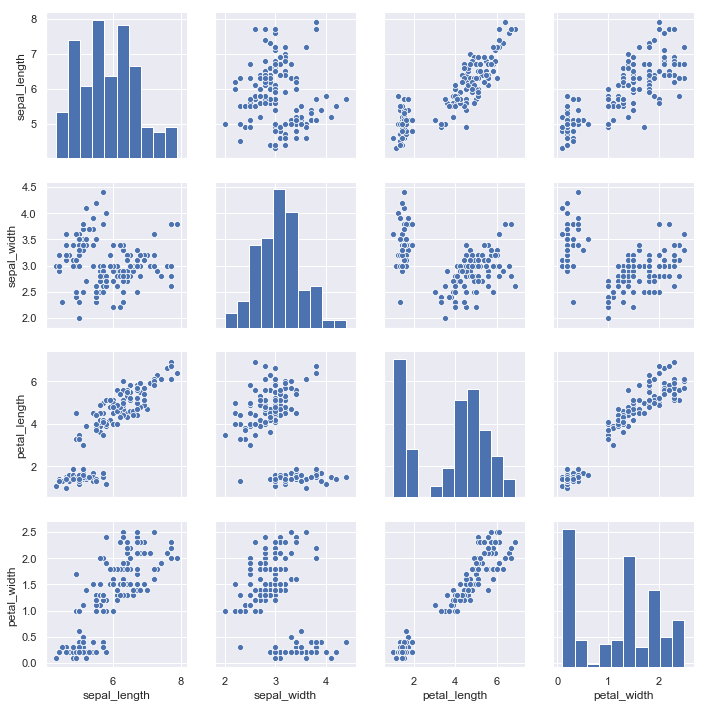

In [6]:
sns.pairplot(iris_data)

In terms of petal/sepal length and width, our data is four-dimensional. Looking at two-dimensional "slices" doesn't show us if obvious groups of points exist in higher dimensions.  While we cannot easily visualize four-dimensional data, we can visualize three-dimensional data.  We can create scatter plots of three of the four dimensions.  Tjhere are four ways of choosing any three dimensions from the four.

In [7]:
import itertools
input_data = iris_data.drop('species', axis=1)
three_dimensions = list(itertools.combinations(input_data.columns, 3))
three_dimensions

[('sepal_length', 'sepal_width', 'petal_length'),
 ('sepal_length', 'sepal_width', 'petal_width'),
 ('sepal_length', 'petal_length', 'petal_width'),
 ('sepal_width', 'petal_length', 'petal_width')]

The following code creates four three-dimensional scatter plots.  Note that we use the `%matplotlib notebook` command to make these interactive. You might have to run the cell twice to see the plots.

<IPython.core.display.Javascript object>


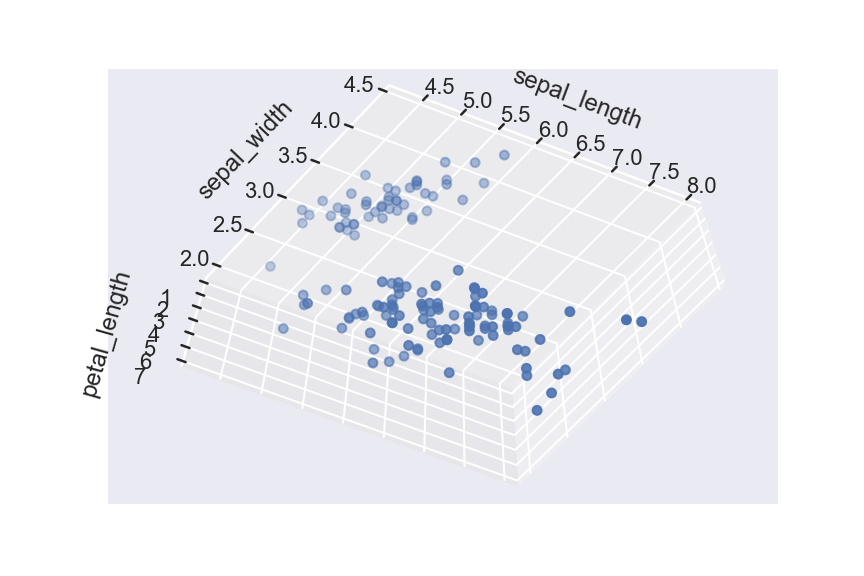

<IPython.core.display.Javascript object>


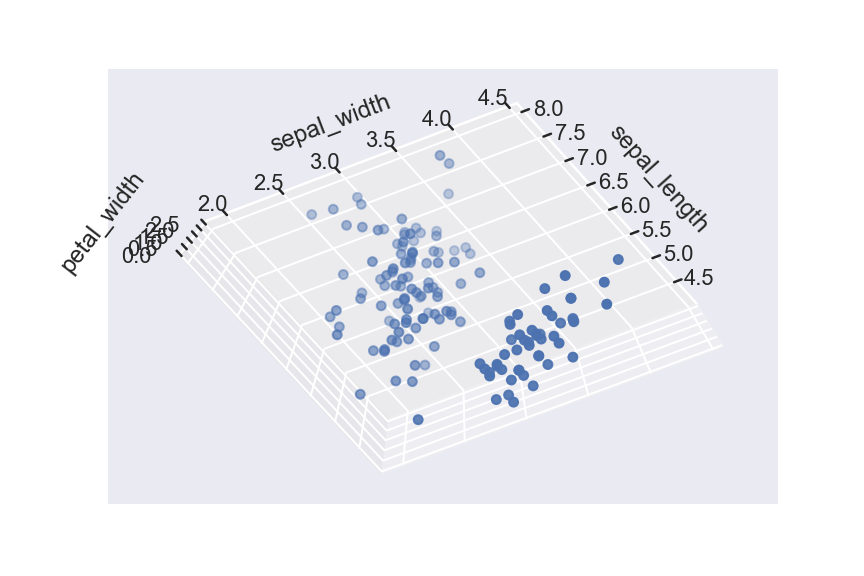

<IPython.core.display.Javascript object>


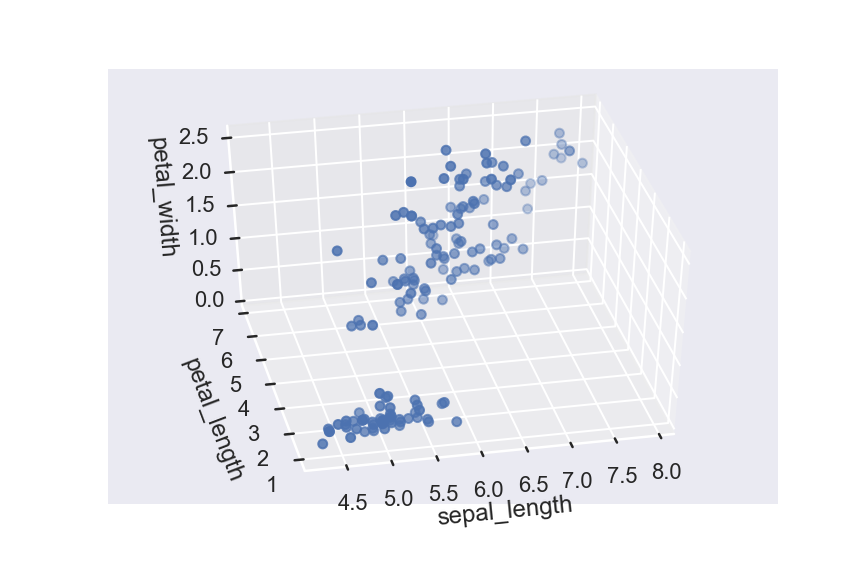

<IPython.core.display.Javascript object>


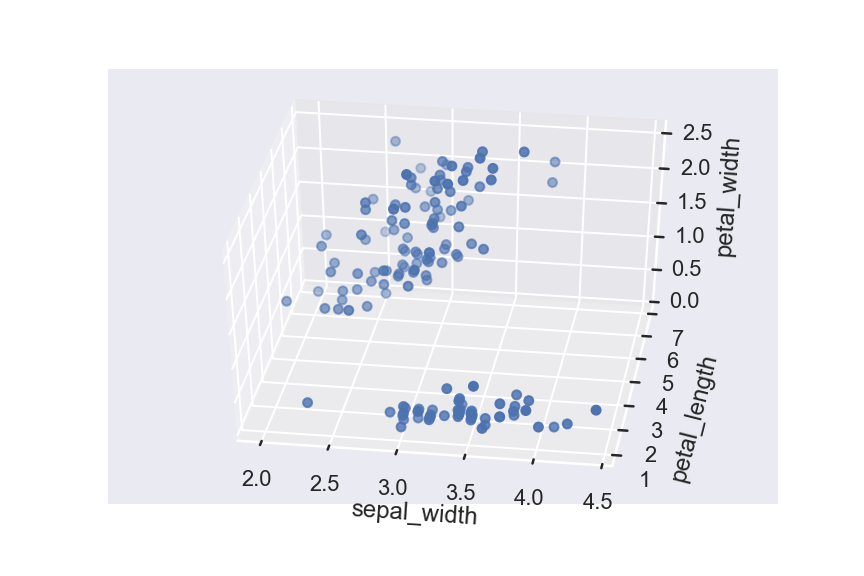

In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

for column_names in three_dimensions:
    x_dim, y_dim, z_dim = column_names
    
    # extract data from DataFrame
    x_data = input_data[x_dim]
    y_data = input_data[y_dim]
    z_data = input_data[z_dim]

    # create figure with 3d projection
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # plot the data
    ax.scatter(x_data, y_data, z_data)
    
    # set axes labels
    ax.set_xlabel(x_dim)
    ax.set_ylabel(y_dim)
    ax.set_zlabel(z_dim)
    plt.show()

We'll return to inlining plots.

In [9]:
% matplotlib inline 

### K-Means

We start by loading the *KMeans* class and creating an instance specifying the number of desired clusters.  We use the *fit()* method to find clusters.

In [10]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=3)
clusters.fit(input_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

We can see which clusters the algorithm assigned the data too using the *labels_* property.

In [11]:
clusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

We can compare cluster labels with the species labels.

In [12]:
for i, label in enumerate(clusters.labels_):
    print(label, iris_data.iloc[i].species)

(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(1, 'versicolor')
(1, 'versicolor')
(2, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versico

We can create scatter plots and and use the cluster labels to color the markers.

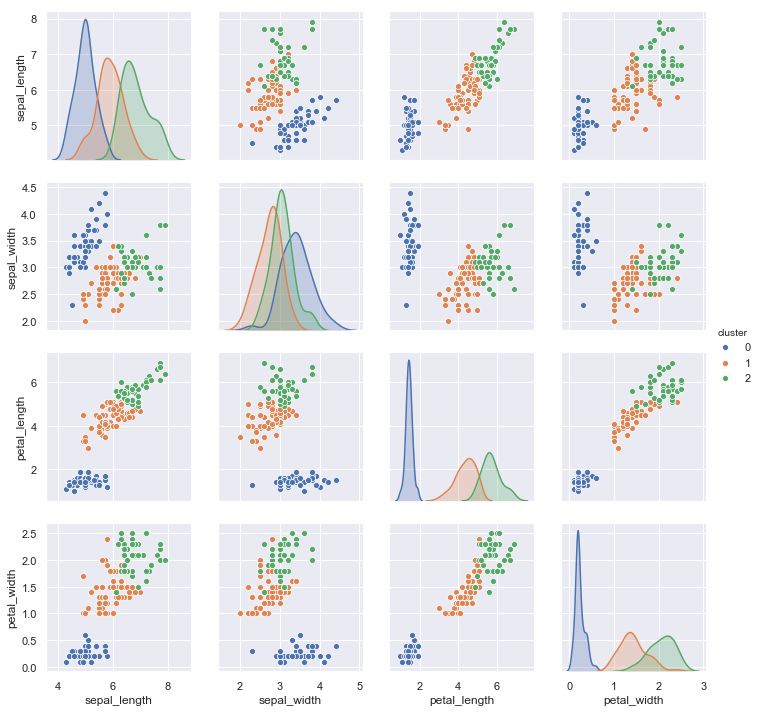

In [13]:
plot_data = input_data.copy()
plot_data['cluster'] = clusters.labels_
sns.pairplot(data=plot_data, hue='cluster', vars=input_data.columns)

Compare this with the known classifications.

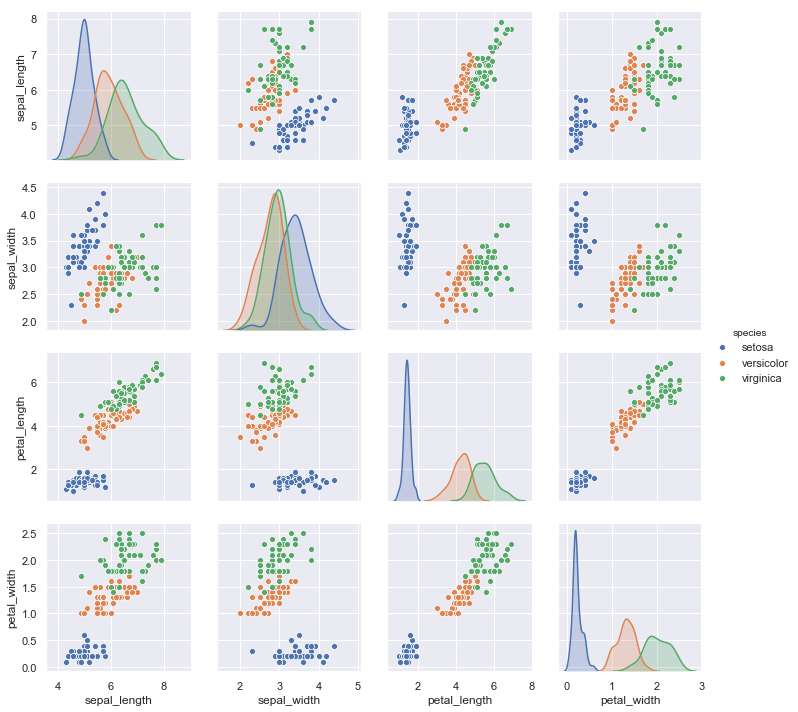

In [14]:
sns.pairplot(data=iris_data, hue='species')

We can see the location of each cluster's centroid.

In [15]:
clusters.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

To visualize these, we first create a DataFrame with the data.

In [16]:
import pandas as pd
centers = pd.DataFrame(clusters.cluster_centers_, columns=input_data.columns)
centers

,sepal_length,sepal_width,petal_length,petal_width
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


We can create pair-wise scatter plots showing the location of the computed clusters' centers and coloring based on species.  There are six ways of choosing two dimensions from four.

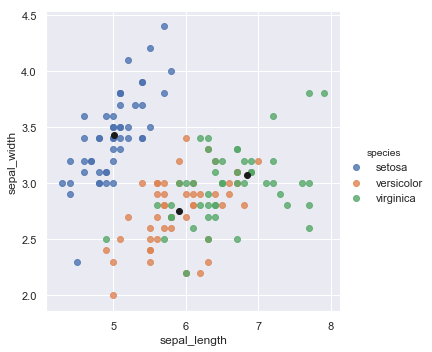

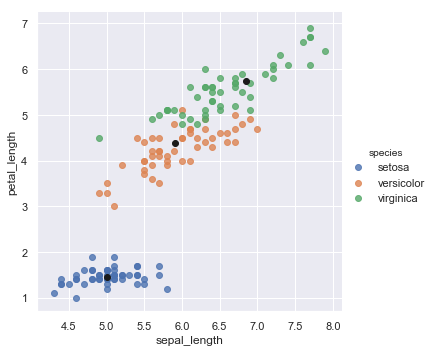

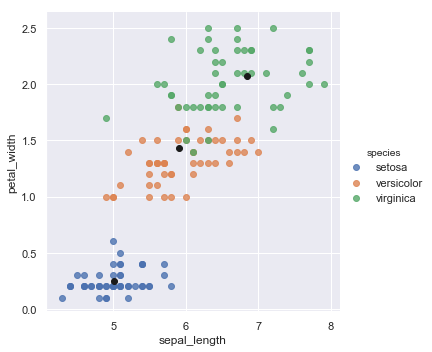

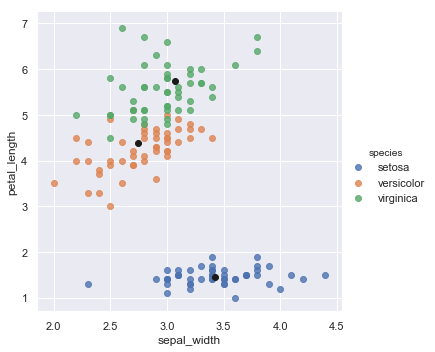

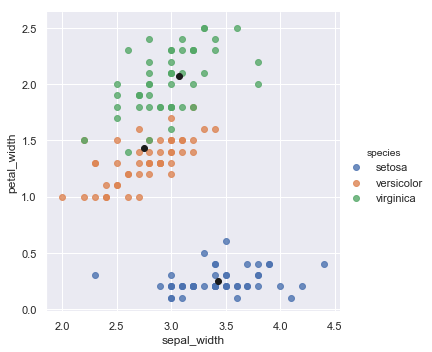

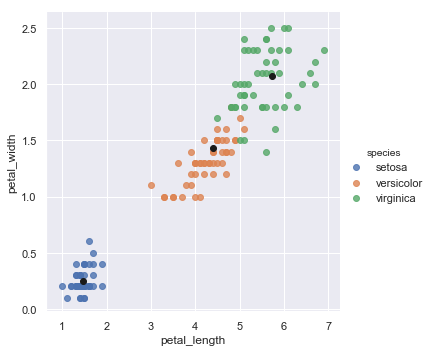

In [17]:
two_dimensions = itertools.combinations(input_data.columns, 2)
for column_names in two_dimensions:
    x_dim, y_dim = column_names
    
    facet = sns.lmplot(x=x_dim, y=y_dim, hue="species", data=iris_data, fit_reg=False)
    
    # plot centers
    facet.ax.plot(centers[x_dim], centers[y_dim], 'ok')

### DBSCAN

To use the DBSCAN algorithm, we start by importing the necessary class, creating an instance, and fitting the data.  Note that we do not specify the desired number of clusters for the DBSCAN algorithm.

In [18]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN()
clusters.fit(input_data)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

We can see which clusters the algorithm assigned the data too using the *labels_* property.

In [19]:
clusters.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

As before, we can display the cluster number and corresponding species for each row of data for comparison.

In [20]:
for index, value in enumerate(clusters.labels_):
    print(value, iris_data.iloc[index].species)

(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(-1, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(0, 'setosa')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(-1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(-1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'versicolor')
(1, 'vers

Unlike K-means, DBSCAN does not compute clusters based on center points.  To get a visual sense of how the clusters compare to the original data, we can create pair-wise scatter plots using the DBSCAN results to for marker hues. We first add the results as a new column to the data.

In [21]:
results = input_data.copy()
results["cluster"] = clusters.labels_
results.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


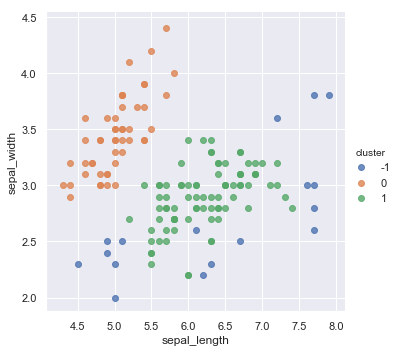

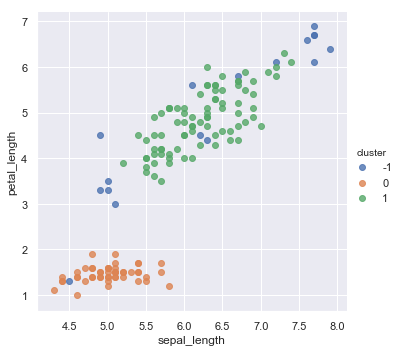

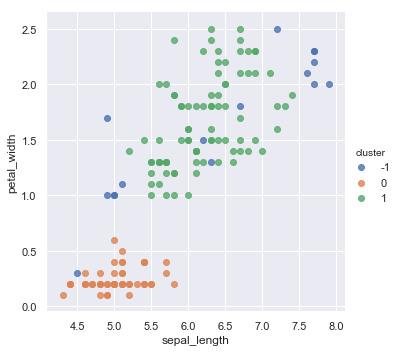

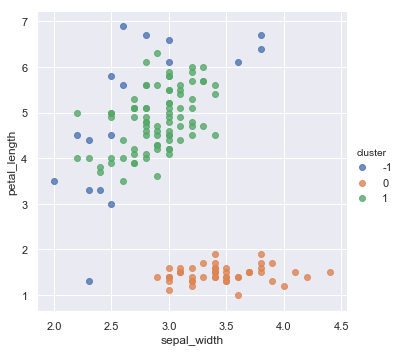

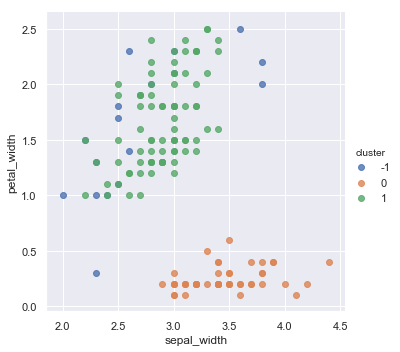

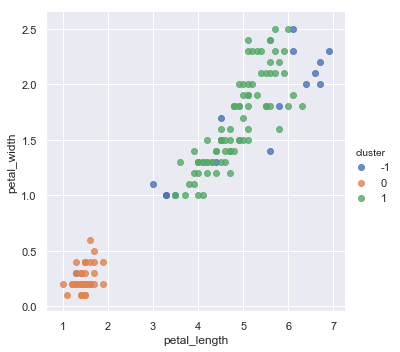

In [22]:
two_dimensions = itertools.combinations(input_data.columns, 2)
for column_names in two_dimensions:
    x_dim, y_dim = column_names    
    sns.lmplot(x=x_dim, y=y_dim, hue="cluster", data=results, fit_reg=False)

While the algorithm identified three clusters, the clusters it identified don't correspond to the known species classifications.

### Principle Component Analysis

In the iris data set, there are four dimensions of input/independent data that can be used to to analyze the data.  While we have been able to get meaningful results using all four dimensions, it would be simpler to work with fewer dimensions (and easier to visualize).  Principle Component Analysis (PCA) attempts to reduce the number of dimensions based on those that have the greatest variability.

To calculate the PCA, we use the *PCA* class.

In [23]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(input_data)

Using *fit_transform()* transforms the source data into values in the desired number of dimensions.  To plot the transformed data, we can create a DataFrame and copy the original species data.

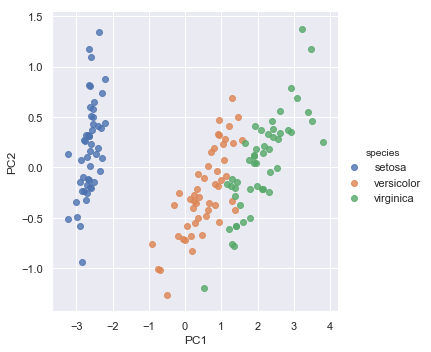

In [24]:
reduced_data = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
plot_data = reduced_data.copy()
plot_data['species'] = iris_data.species
sns.lmplot(x='PC1', y='PC2', data=plot_data, hue='species', fit_reg=False)

**Save the notebook file and submit it on Blackboard for this week's lab.**

## Additional Resources

- [Comparing different clustering algorithms on toy datasets](scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)

## Exercise

Use K-means to find three clusters of the reduced-dimensionality data created using the PCA algorithm, `reduced_data`.  Create a scatter plot with marker coloring based on the clusters found using K-means.  **Save the notebook and submit it for this week's exercise.**